## Lab 3: Working with images

Written by: Enrique Mireles Gutiérrez  
ID Number: 513944  
Bachelor: ITR  
Date: 2019-02-10  

### Introduction

### Objectives

This lab has the following objectives:

- Getting image properties, such as number of channels, image resolution, data type, min, and max pixel intensity values.
- Retrieving intensity values of pixels in an image and how to modify them.
- Setting a region of interest (ROI).
- Spitting and merging image channels.


### Procedure

This lab report is subdivided in smaller numbered programs shown below.

#### 1. Importing Libraries

The following libraries are used throughout the lab report:
- cv2: OpenCV library used for artificial vision. Produces images in BGR color space by default.
- numpy: Library used for matrix operations.
- matplotlib: Create plots. Requires images in RGB color space.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 2. Constant definitions

The following lines define the constants used throughout the lab report:

In [2]:
IMAGE_IN_FILENAME = '../fig/lenna.png'

#### 3. Useful functions

The following functions are used several times. In order to avoid repetition they are defined here.

In [3]:
def is_grayscale(img):
    """
        Returns true if the image is grayscale (channels == 1).
        Returns false if channels > 1.
    """
    
    # If img.shape has a channel value, read it and determine if
    # it is a grayscale image. If it doesn't have, assume that the
    # image is grayscale.
    if (len(img.shape) == 3):
        return img.shape[2] == 1
    return True


def print_image_statistics(img, head_string):
    """
        Print image statistics to console.
    """
    
    # Get ampount of channels from image.
    channels = 1 if is_grayscale(img) else img.shape[2]
    
    # Print information.
    print('\n%s' % head_string)
    print('colour image size: ', img.shape)
    print('image width resolution: ', img.shape[0])
    print('image height resolution: ', img.shape[1])
    print('number of channels: ', channels)
    print('minimum intensity value: ', img.min())
    print('max intensity value: ', img.max())
    print('meam intensity value: ', img.mean())
    print('type of image: ', img.dtype)

def visualise_image(img, fig_number, fig_title):
    """
        Plot image to a matplotlib figure.
    """
    
    # Select the figure.
    plt.figure(fig_number)
    
    # Determine the channels of the image and plot accodingly.
    if (is_grayscale(img)):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    
    # Set plot labels.
    plt.title(fig_title)
    plt.xlabel('x-resolution')
    plt.ylabel('y-resolution')
    
def read_image_safe(filename, color, conversion=False):
    """
        Read an image in specified color space.
        If the image cannot be opened then exit the program and alert the user.
        Do a color space conversion if specified by the user.
    """
    
    # Read image and if it fails exit.
    img = cv2.imread(filename, color)
    if img is None:
        print('ERROR: image ', filename, 'could not be read')
        exit()
    
    # Do conversion if requested. Return image.
    if conversion:
        return cv2.cvtColor(img, conversion)
    return img

#### 4. Getting image properties


COLOUR IMAGE STATS:
colour image size:  (512, 512, 3)
image width resolution:  512
image height resolution:  512
number of channels:  3
minimum intensity value:  3
max intensity value:  255
meam intensity value:  128.228375753
type of image:  uint8

GREYSCALE IMAGE STATS:
greyscale image size (512, 512)
greyscale image width resolution:  512
greyscale image height resolution:  512
number of channels:  1
minimum intensity value:  22
max intensity value:  239
meam intensity value:  110.207302094
type of image:  uint8


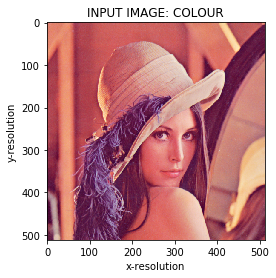

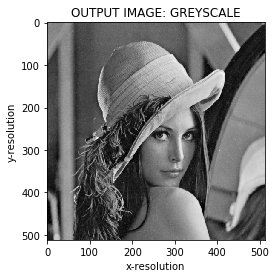

In [4]:
# read image
img_colour = read_image_safe(IMAGE_IN_FILENAME, cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

# -------------------- PROCESS COLOUR IMAGE -------------------- #

# get image size
img_size = img_colour.shape

# print image size
print('\nCOLOUR IMAGE STATS:')
print('colour image size: ', img_size)

# retrieve image width resolution
print('image width resolution: ', img_size[0])

# retrieve image height resolution
print('image height resolution: ', img_size[1])

# retrieve number of channels
print('number of channels: ', img_size[2])

# minimum pixel value in image
print('minimum intensity value: ', img_colour.min())

# minimum pixel value in image
print('max intensity value: ', img_colour.max())

# maximum intensity value in image
print('meam intensity value: ', img_colour.mean())

# print type of image
print('type of image: ', img_colour.dtype)

# visualise colour image
plt.figure(1)
plt.imshow(img_colour)
plt.title('INPUT IMAGE: COLOUR')
plt.xlabel('x-resolution')
plt.ylabel('y-resolution')


# ------------------ PROCESS GREYSCALE IMAGE ------------------- #

# convert the input colour image into a grayscale image
img_greyscale = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)

# get greyscale image size
img_size = img_greyscale.shape

# retrieve size of greyscale image
print('\nGREYSCALE IMAGE STATS:')
print('greyscale image size', img_size)

# retrieve image width resolution
print('greyscale image width resolution: ', img_size[0])

# retrieve image height resolution
print('greyscale image height resolution: ', img_size[1])

# retrieve number of channels
print('number of channels: ', 1)

# minimum pixel value in image
print('minimum intensity value: ', img_greyscale.min())

# minimum pixel value in image
print('max intensity value: ', img_greyscale.max())

# maximum intensity value in image
print('meam intensity value: ', img_greyscale.mean())

# print type of image
print('type of image: ', img_greyscale.dtype)

# visualise image using matplotlib
plt.figure(2)
plt.imshow(img_greyscale, cmap='gray')
plt.title('OUTPUT IMAGE: GREYSCALE')
plt.xlabel('x-resolution')
plt.ylabel('y-resolution')

# display both windows with the colour and greyscale images
plt.show()


COLOUR IMAGE STATS:
colour image size:  (512, 512, 3)
image width resolution:  512
image height resolution:  512
number of channels:  3
minimum intensity value:  3
max intensity value:  255
meam intensity value:  128.228375753
type of image:  uint8

GREYSCALE IMAGE STATS:
colour image size:  (512, 512)
image width resolution:  512
image height resolution:  512
number of channels:  1
minimum intensity value:  22
max intensity value:  239
meam intensity value:  110.207302094
type of image:  uint8


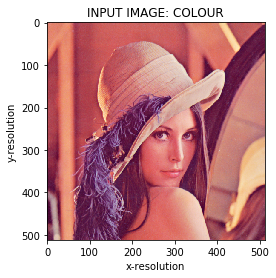

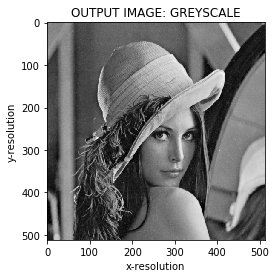

In [5]:
# read image
img_colour = read_image_safe(IMAGE_IN_FILENAME, cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

# convert the input colour image into a grayscale image
img_greyscale = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)

# print colour image stats and visualise it
print_image_statistics(img_colour, 'COLOUR IMAGE STATS:')
visualise_image(img_colour, 1, 'INPUT IMAGE: COLOUR')

# print greyscale image stats and visualise it
print_image_statistics(img_greyscale, 'GREYSCALE IMAGE STATS:')
visualise_image(img_greyscale, 2, 'OUTPUT IMAGE: GREYSCALE')

# visualise figures
plt.show()

#### 5. Retrieving intensity values of pixels

Access to pixel values by indexing row and cols.

Every pixel has a row and column. Accesed by img[x, y]. At every position an array containing the intensity of every channel is found. For color images a [b, g, r] array is found. For gray scale images a no array is found, only a value k.

COLOUR IMAGE:

	pixel intensity value at ( 100 , 100 ):  [178  68  78]

	Accessing pixel values using image array
		RED pixel intensity value at ( 100 , 100 ):  178
		GREEN pixel intensity value at ( 100 , 100 ):  68
		BLUE pixel intensity value at ( 100 , 100 ):  78

	Accessing pixel values using pre-built method item()
		RED pixel intensity value at ( 100 , 100 ):  178
		GREEN pixel intensity value at ( 100 , 100 ):  68
		BLUE pixel intensity value at ( 100 , 100 ):  78

GREYSCALE IMAGE:

	pixel intensity value at ( 100 , 100 ):  84

	Accessing pixel values using image array
		grey pixel intensity value at ( 100 , 100 ):  84

	Accessing pixel values using pre-built method item()
		grey pixel intensity value at ( 100 , 100 ):  84


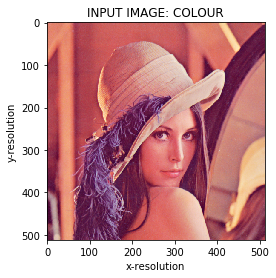

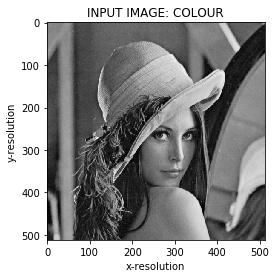

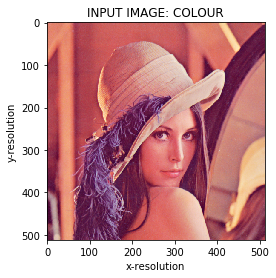

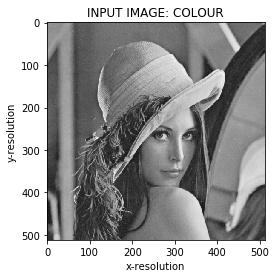

In [6]:
# read image
img_colour = read_image_safe(IMAGE_IN_FILENAME, cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

# convert the input colour image into a grayscale image
img_greyscale = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)

# visualise image using matplotlib
visualise_image(img_colour, 1, 'INPUT IMAGE: COLOUR')

# visualise image using matplotlib
visualise_image(img_greyscale, 2, 'INPUT IMAGE: COLOUR')

# retrieve pixel intensity value at given row/col of colour image
row, col = 100, 100

# ----------------------- READ PIXEL VALUE ----------------------------- #
print('COLOUR IMAGE:')
print('\n\tpixel intensity value at', '(', row, ',', col, '): ', img_colour[row, col])
print('\n\tAccessing pixel values using image array')
print('\t\tRED pixel intensity value at', '(', row, ',', col, '): ', img_colour[row, col, 0])
print('\t\tGREEN pixel intensity value at', '(', row, ',', col, '): ', img_colour[row, col, 1])
print('\t\tBLUE pixel intensity value at', '(', row, ',', col, '): ', img_colour[row, col, 2])
print('\n\tAccessing pixel values using pre-built method item()')
print('\t\tRED pixel intensity value at', '(', row, ',', col, '): ', img_colour.item(row, col, 0))
print('\t\tGREEN pixel intensity value at', '(', row, ',', col, '): ', img_colour.item(row, col, 1))
print('\t\tBLUE pixel intensity value at', '(', row, ',', col, '): ', img_colour.item(row, col, 2))

print('\nGREYSCALE IMAGE:')
print('\n\tpixel intensity value at', '(', row, ',', col, '): ', img_greyscale[row, col])
print('\n\tAccessing pixel values using image array')
print('\t\tgrey pixel intensity value at', '(', row, ',', col, '): ', img_greyscale[row, col])
print('\n\tAccessing pixel values using pre-built method item()')
print('\t\tgrey pixel intensity value at', '(', row, ',', col, '): ', img_greyscale.item(row, col))

# -------------------- MODIFY PIXEL VALUE ------------------------------ #
# modify pixel intensity values in colour image
img_colour[row, col] = [0, 0, 0]

# uncomment the lines below if you want to modify the pixel value using the pre-built method set()
#img_colour.itemset((row,col,0),0)
#img_colour.itemset((row,col,1),0)
#img_colour.itemset((row,col,2),0)

# visualise image using matplotlib
visualise_image(img_colour, 3, 'INPUT IMAGE: COLOUR')

# modify pixel intensity values in greyscale image
img_greyscale[row, col] = 0

# uncomment the lines below if you want to modify the pixel value using the pre-built method itemset()
# img_greyscale.itemset((row,col),0)

# visualise image using matplotlib
visualise_image(img_greyscale, 4, 'INPUT IMAGE: COLOUR')

# visualise figures
plt.show()

#### 6. Creating a region of interest

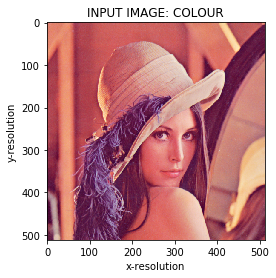

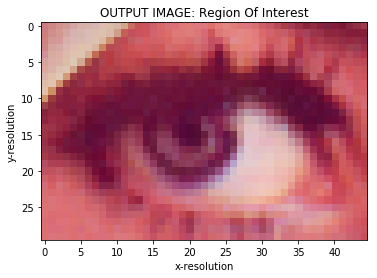

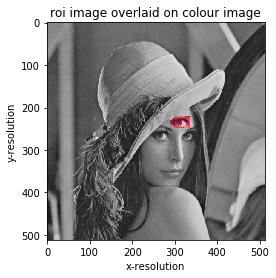

In [7]:
# read image
img_colour = read_image_safe(IMAGE_IN_FILENAME, cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

# Create a grayscale image with three equal channels [k, k, k]
img_grayscale = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)
img_backtorgb = cv2.cvtColor(img_grayscale,cv2.COLOR_GRAY2RGB)

# visualise image using matplotlib
visualise_image(img_colour, 1, 'INPUT IMAGE: COLOUR')

# Start position of the ROI
p0 = (245, 250)

# Dimensions of the ROI
w = 45
h = 30

# create a region of interest
# NOTE THE FOLLOWING:
# FIRST RANGE REPRESENTS COORDINATES FOR THE Y-AXIS
# SECOND RANGE REPRESENTS COORDINATES FOR THE X-AXIS
img_roi = img_colour[p0[1]:p0[1]+h, p0[0]:p0[0]+w]

# visualise region of interest ROI in a new figure
visualise_image(img_roi, 2, 'OUTPUT IMAGE: Region Of Interest')

# overlay roi on colour image
p1 = (290, 220)
img_backtorgb[p1[1]:p1[1]+h, p1[0]:p1[0]+w] = img_roi

# visualise region of interest ROI on colour image
visualise_image(img_backtorgb, 3, 'roi image overlaid on colour image')

# display figures
plt.show()

#### 7. Splitting and merging image channels

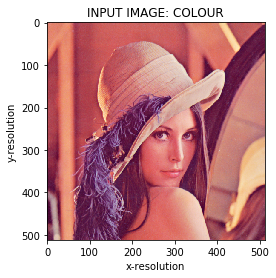

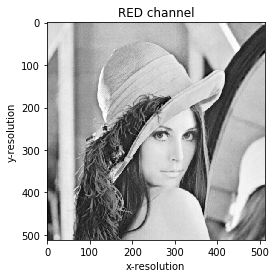

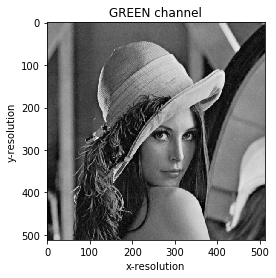

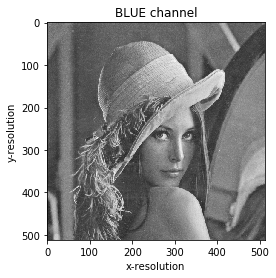

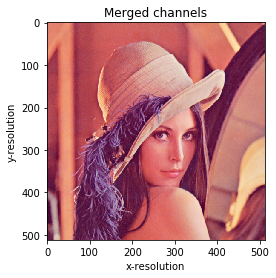

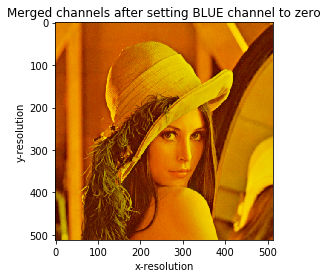

In [8]:
# read image
img_colour = read_image_safe(IMAGE_IN_FILENAME, cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

# visualise image using matplotlib
visualise_image(img_colour, 1, 'INPUT IMAGE: COLOUR')

# split colour image channels
r_channel,g_channel,b_channel = cv2.split(img_colour)

# visualise each channel
visualise_image(r_channel, 2, 'RED channel')
visualise_image(g_channel, 3, 'GREEN channel')
visualise_image(b_channel, 4, 'BLUE channel')

# merge channels
img_original = cv2.merge((r_channel, g_channel, b_channel))
visualise_image(img_original, 5, 'Merged channels')

# set blue channel to zero
b_channel[:,:] = 0

# merge channels after setting blue channel to zero
img_bzero = cv2.merge((r_channel, g_channel, b_channel))
visualise_image(img_bzero, 6, 'Merged channels after setting BLUE channel to zero')

# display figures
plt.show()

#### 8. Code performance measurement


Conversion from colour to greyscale took:  0.000317395 seconds

COLOUR IMAGE STATS:
colour image size:  (512, 512, 3)
image width resolution:  512
image height resolution:  512
number of channels:  3
minimum intensity value:  3
max intensity value:  255
meam intensity value:  128.228375753
type of image:  uint8

CODE PERFORMANCE:
printing colour image stats took:  0.003035994 seconds
visualising colour image took:  0.037637374 seconds

GREYSCALE IMAGE STATS:
colour image size:  (512, 512)
image width resolution:  512
image height resolution:  512
number of channels:  1
minimum intensity value:  22
max intensity value:  239
meam intensity value:  110.207302094
type of image:  uint8

CODE PERFORMANCE:
Printing greyscale image stats took:  0.005915165 seconds
Visualising grey colour image took:  0.028213334 seconds


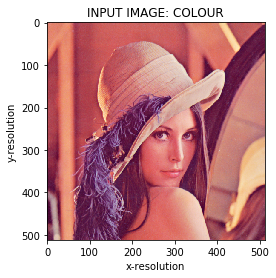

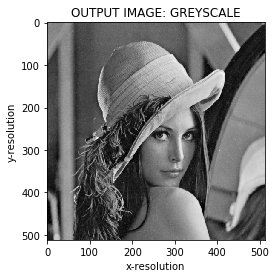

In [9]:
# read image
img_colour = read_image_safe(IMAGE_IN_FILENAME, cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

# convert the input colour image into a grayscale image
e1 = cv2.getTickCount()
img_greyscale = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print('\nConversion from colour to greyscale took: ', time, 'seconds')

# print colour image stats and visualise it
e1 = cv2.getTickCount()
print_image_statistics(img_colour, 'COLOUR IMAGE STATS:')
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print('\nCODE PERFORMANCE:')
print('printing colour image stats took: ', time, 'seconds')

e1 = cv2.getTickCount()
visualise_image(img_colour, 1, 'INPUT IMAGE: COLOUR')
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print('visualising colour image took: ', time, 'seconds')

# print greyscale image stats and visualise it
e1 = cv2.getTickCount()
print_image_statistics(img_greyscale, 'GREYSCALE IMAGE STATS:')
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print('\nCODE PERFORMANCE:')
print('Printing greyscale image stats took: ', time, 'seconds')

e1 = cv2.getTickCount()
visualise_image(img_greyscale, 2, 'OUTPUT IMAGE: GREYSCALE')
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print('Visualising grey colour image took: ', time, 'seconds')

# visualise figures
plt.show()

#### 9. Select pixels within a range

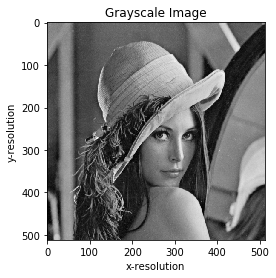

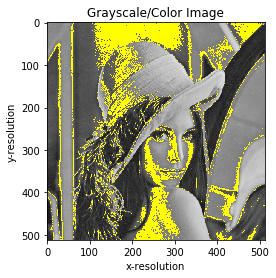

In [16]:
# Read Image
img_color = read_image_safe(IMAGE_IN_FILENAME, cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
img_graycolor = cv2.cvtColor(img_grayscale, cv2.COLOR_GRAY2BGR)

# Define range
r = (100, 120)

# Dimensions
w = img_graycolor.shape[0]
h = img_graycolor.shape[1]

# Look for pixels within range and set them yellow.
for i in range(w):
    for j in range(h):
        val = img_graycolor[i, j][0]
        if (val <= r[1] and val >= r[0]):
            img_graycolor[i, j] = [255, 255, 0]

# Plot
visualise_image(img_greyscale, 1, "Grayscale Image")
visualise_image(img_graycolor, 2, "Grayscale/Color Image")

### Conclusions

### References

_I hereby affirm that I have done this activity with academic integrity._